In [1]:
import pandas as pd
import statistics as s
import scipy.stats as ss
import numpy as np

### Session 6 - 11/04/2020

In [2]:
df = pd.read_csv("Salary.csv")

#### Display outliers in salary

In [3]:
q1 = df['salary'].quantile(.25)
q3 = df['salary'].quantile(.75)
iqr = q3 - q1

outliers = []

for n in df['salary']:
    if n < (q1-(1.5*iqr)) or n > (q3+(1.5*iqr)):
        outliers.append(n)

print(f"Number of outliers = {len(outliers)}, Outliers = {outliers}")

Number of outliers = 0, Outliers = []


#### Display outliers in experience

In [4]:
q1 = df['exp'].quantile(.25)
q3 = df['exp'].quantile(.75)
iqr = q3 - q1

outliers = []

for n in df['exp']:
    if n < (q1-(1.5*iqr)) or n > (q3+(1.5*iqr)):
        outliers.append(n)

print(f"Number of outliers = {len(outliers)}, Outliers = {outliers}")

Number of outliers = 0, Outliers = []


#### Use persons.csv and display mean, median, stddev, IQR for height and weight

In [6]:
dp = pd.read_csv("persons.csv")
print(f"Number of observations/rows = {len(dp)}")
dp.head()
print(f"Mean Height = {dp['Height'].mean()}, Mean Weight = {dp['Weight'].mean()}")
print(f"Median Height = {dp['Height'].median()}, Median Weight = {dp['Weight'].median()}")
print(f"StdDev Height = {s.stdev(dp['Height'])}, StdDev Weight = {s.stdev(dp['Weight'])}")
print(f"IQR Height = {ss.iqr(dp['Height'])}, IQR Weight = {ss.iqr(dp['Weight'])}")

Number of observations/rows = 500
Mean Height = 169.944, Mean Weight = 106.0
Median Height = 170.5, Median Weight = 106.0
StdDev Height = 16.375260679593755, StdDev Weight = 32.38260746964435
IQR Height = 28.0, IQR Weight = 56.0


### Session 7 - 13/04/2020

#### For persons.csv, find out:
1. Skewness in height
1. Skewness in weight
1. Draw box plots for height and weight
1. Draw scatter plot for height and weight

In [7]:
print("Skewness in height",ss.skew(dp['Height']))
print("Skewness in weight",ss.skew(dp['Weight']))

Skewness in height -0.12154764352037799
Skewness in weight -0.037579065848604216


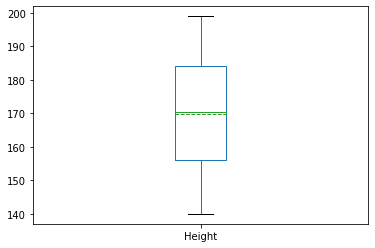

In [8]:
dp['Height'].plot.box(showmeans=True,meanline=True)

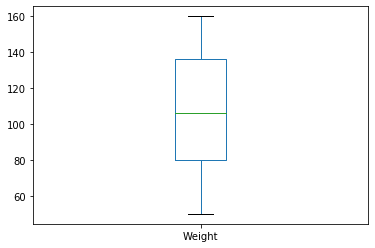

In [9]:
dp['Weight'].plot.box(showmeans=True,meanline=True)

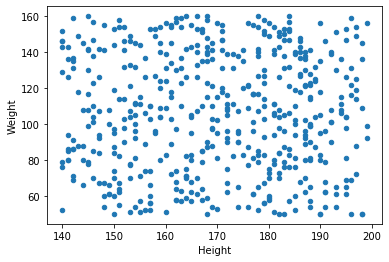

In [10]:
dp.plot.scatter(x='Height',y='Weight')

#### Think of data where you have negative correlation

- If the train speed increases, duration of travel reduces
- As the slope of the road/hill increases, speed of a cyclist or walker decreases
- As the car gets older, the insurance amount decreases as IDV decreases
- As house gets older, the value decreases

### Session 8 - 14/04/2020

#### Consider ages (in years), sizes (in sqft) and prices (in lakhs INR) for 10 houses and calculate the price based on size and age.

#### Create sample data

In [11]:
sizes = [2400,2000,2600,1200,1670,1550,3000,2400,1400,3200]  # SQFT
ages =  [5,6,2,10,11,7,5,6,8,1]    # Years
prices = [20,18,28,12,14,16,22,20,14,32]  # Lakhs

#### Find out correlation

In [16]:
ss.pearsonr(sizes,prices)

(0.9029830039945835, 0.0003442628472954716)

In [17]:
ss.pearsonr(ages,prices)

(-0.9507988998204895, 2.4154732242000998e-05)

#### Calculate slope and intercept

In [18]:
size_reg = ss.linregress(sizes, prices)
size_reg

LinregressResult(slope=0.008404259343319715, intercept=1.5980764866091697, rvalue=0.9029830039945835, pvalue=0.00034426284729547143, stderr=0.0014138920170457116)

In [19]:
age_reg = ss.linregress(ages, prices)
age_reg

LinregressResult(slope=-1.9302587176602928, intercept=31.374578177727784, rvalue=-0.9507988998204897, pvalue=2.415473224200055e-05, stderr=0.2223696520702189)

In [20]:
size_avg = s.mean(sizes)
age_avg =  s.mean(ages)
price_avg = s.mean(prices)

In [21]:
intercept = price_avg - size_reg.slope * size_avg  - age_reg.slope * age_avg

In [22]:
# Calculate prices based on reg line for both size and age
for (size,age, price) in zip(sizes,ages,prices):
    p_price = intercept + size * size_reg.slope +  age * age_reg.slope
    # find out the difference between predicted and actual 
    diff = p_price - price
    print(f"{size:5} {age:5} {p_price:8.2f} {price:8.2f} {diff:8.2f}")

 2400     5    23.89    20.00     3.89
 2000     6    18.60    18.00     0.60
 2600     2    31.36    28.00     3.36
 1200    10     4.16    12.00    -7.84
 1670    11     6.17    14.00    -7.83
 1550     7    12.89    16.00    -3.11
 3000     5    28.93    22.00     6.93
 2400     6    21.96    20.00     1.96
 1400     8     9.70    14.00    -4.30
 3200     1    38.34    32.00     6.34


### Session 9 - 15/04/2020

#### Create an array of 5 * 5 with random numbers in the range 1 to 100 and display how many numbers in the array are even numbers.

In [25]:
# Version 1
a = np.random.randint(1,100,(5,5))
print(a)
count = 0
for r in a:
    for v in r:
        if v % 2 == 0:
            #print(v, end=' ')
            count += 1
print(count)

[[76 67 83 28 94]
 [50 37 14 29 37]
 [19 25 61  7  3]
 [58 51 98 33 70]
 [65 28 63 58 40]]
11


In [13]:
# Count number of even numbers in 5 * 5 array - Version 2
a = np.random.randint(1,10,(5,5))
# Both work
print(a[ a % 2 == 0].size)
print((a % 2 == 0).sum())

10
10


### Session 10 - 16/04/2020

#### Take an array of 10 elements and increment all even numbers by 1 and odd numbers by 2

In [15]:
a = np.random.randint(1,10,10)
print("Orignial Array : ", a)
even_idx = a % 2 == 0
odd_idx = a % 2 == 1
a[even_idx] = a[even_idx] + 1
a[odd_idx] = a[odd_idx] + 2
print("Modified Array : ",a)

Orignial Array :  [9 1 2 9 9 7 4 8 5 6]
Modified Array :  [11  3  3 11 11  9  5  9  7  7]


#### Display the elements in the array that are greater than the average of the array

In [16]:
a = np.random.randint(1,10,10)
avg = a.mean()
print(a, avg)
a[a > avg]

[4 7 3 6 4 4 6 8 8 7] 5.7


array([7, 6, 6, 8, 8, 7])

#### Take an array of 10 rows with 5 columns (fill it with random numbers) and display average for each row and which row is having highest average (if 2 students got the same highest average, display both the student rows).

In [18]:
a = np.random.randint(50,100,(10,5))
print(a)
avg = a.mean(axis=1)
print("Averages for each row = ", avg)
max_avg = avg.max()
print("Highest average = ", max_avg)
a[a.mean(axis=1) == max_avg]

[[90 74 69 64 75]
 [56 55 73 53 78]
 [99 60 69 86 69]
 [52 55 57 91 71]
 [87 57 84 52 72]
 [65 81 98 61 74]
 [58 74 99 79 58]
 [69 81 62 69 77]
 [72 79 61 87 98]
 [70 86 87 51 87]]
Averages for each row =  [74.4 63.  76.6 65.2 70.4 75.8 73.6 71.6 79.4 76.2]
Highest average =  79.4


array([[72, 79, 61, 87, 98]])

###  Session 11 - 17/04/2020

#### Find a scenario where broadcast is not possible. See whether broadcasting can be achieved by transposing or reshaping.

In [19]:
a = np.random.randint(1,9,(2,4))
b = np.random.randint(1,9,(4,2))
print(a)
print(b)
a + b

[[3 5 5 4]
 [7 5 5 3]]
[[7 1]
 [7 5]
 [1 3]
 [3 3]]


ValueError: operands could not be broadcast together with shapes (2,4) (4,2) 

In [20]:
a + b.T

array([[10, 12,  6,  7],
       [ 8, 10,  8,  6]])

#### Take 2 arrays of 5 * 5 and display how many corresponding elements in both arrays are having same values

In [22]:
a = np.random.randint(1,15,(5,5))
b = np.random.randint(1,15,(5,5))
print(a)
print(b)
(a == b).sum()  # Count number of elements with same values in corresponding positions

[[11  1  7 11  3]
 [ 3  8  4 14 13]
 [ 8  8  7  5 10]
 [13  3 10 12 14]
 [ 6 14  7 11  2]]
[[14  6 10 11  9]
 [10 12  2  6 11]
 [ 5  9 10  7  1]
 [ 7  4  2  7  7]
 [ 3 12  4  7  4]]


1

In [23]:
# Print all values and positions
count = 0
for i in range(0,4):
    for j in range(0,4):
        if a[i,j] == b[i,j]:
            print(f"At [{i},{j}], value = {a[i,j]}")
            count += 1 
print(count)

At [0,3], value = 11
1


#### Find out whether you get a view or a copy for boolean indexing

In [24]:
a = np.array([1,2,3,4,5])
b = a[a % 2 == 0]

In [27]:
print(a)
b[0] = 10
print(b)

[1 2 3 4 5]
[10  4]


##### a is not affected by changing b; therefore, a copy is created for boolean indexing

### Session 12 - 18/04/2020

In [29]:
import matplotlib.pyplot as plt
import matplotlib.image as image
from scipy import misc

#### Take an image, split it into two halves vertically and interchange those two parts (hint: split & stack in reverse order). 

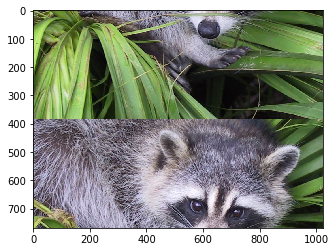

In [30]:
raccoon = misc.face()
img1, img2 = np.vsplit(raccoon,2)
new_img = np.vstack((img2,img1))
plt.imshow(new_img)

#### Load an image and interchange red with green.

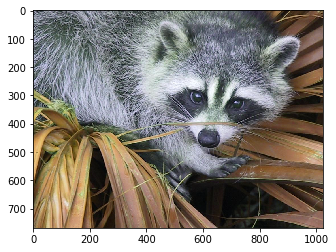

In [39]:
raccoon = misc.face()
r_img = raccoon.copy()
for p in r_img:
    for n in p:
        n[0],n[1] = n[1], n[0]  # Swap red and green
plt.imshow(r_img)

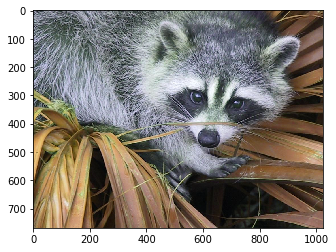

In [38]:
# Another way to swap red and green
raccoon = misc.face()
img = raccoon.copy()
red = img[:,:,0].copy()
green = img[:,:,1].copy()
img[:,:,1] = red
img[:,:,0] = green
plt.imshow(img)

In [40]:
# Verification
raccoon[0,0], img[0,0]

(array([121, 112, 131], dtype=uint8), array([112, 121, 131], dtype=uint8))

### Session 13 - 20/04/2020

In [42]:
countries = pd.read_json("https://restcountries.eu/rest/v2/all")

In [43]:
countries.head()

,name,topLevelDomain,alpha2Code,alpha3Code,callingCodes,capital,altSpellings,region,subregion,population,...,timezones,borders,nativeName,numericCode,currencies,languages,translations,flag,regionalBlocs,cioc
0,Afghanistan,[.af],AF,AFG,[93],Kabul,"[AF, Afġānistān]",Asia,Southern Asia,27657145,...,[UTC+04:30],"[IRN, PAK, TKM, UZB, TJK, CHN]",افغانستان,4.0,"[{'code': 'AFN', 'name': 'Afghan afghani', 'sy...","[{'iso639_1': 'ps', 'iso639_2': 'pus', 'name':...","{'de': 'Afghanistan', 'es': 'Afganistán', 'fr'...",https://restcountries.eu/data/afg.svg,"[{'acronym': 'SAARC', 'name': 'South Asian Ass...",AFG
1,Åland Islands,[.ax],AX,ALA,[358],Mariehamn,"[AX, Aaland, Aland, Ahvenanmaa]",Europe,Northern Europe,28875,...,[UTC+02:00],[],Åland,248.0,"[{'code': 'EUR', 'name': 'Euro', 'symbol': '€'}]","[{'iso639_1': 'sv', 'iso639_2': 'swe', 'name':...","{'de': 'Åland', 'es': 'Alandia', 'fr': 'Åland'...",https://restcountries.eu/data/ala.svg,"[{'acronym': 'EU', 'name': 'European Union', '...",
2,Albania,[.al],AL,ALB,[355],Tirana,"[AL, Shqipëri, Shqipëria, Shqipnia]",Europe,Southern Europe,2886026,...,[UTC+01:00],"[MNE, GRC, MKD, KOS]",Shqipëria,8.0,"[{'code': 'ALL', 'name': 'Albanian lek', 'symb...","[{'iso639_1': 'sq', 'iso639_2': 'sqi', 'name':...","{'de': 'Albanien', 'es': 'Albania', 'fr': 'Alb...",https://restcountries.eu/data/alb.svg,"[{'acronym': 'CEFTA', 'name': 'Central Europea...",ALB
3,Algeria,[.dz],DZ,DZA,[213],Algiers,"[DZ, Dzayer, Algérie]",Africa,Northern Africa,40400000,...,[UTC+01:00],"[TUN, LBY, NER, ESH, MRT, MLI, MAR]",الجزائر,12.0,"[{'code': 'DZD', 'name': 'Algerian dinar', 'sy...","[{'iso639_1': 'ar', 'iso639_2': 'ara', 'name':...","{'de': 'Algerien', 'es': 'Argelia', 'fr': 'Alg...",https://restcountries.eu/data/dza.svg,"[{'acronym': 'AU', 'name': 'African Union', 'o...",ALG
4,American Samoa,[.as],AS,ASM,[1684],Pago Pago,"[AS, Amerika Sāmoa, Amelika Sāmoa, Sāmoa Amelika]",Oceania,Polynesia,57100,...,[UTC-11:00],[],American Samoa,16.0,"[{'code': 'USD', 'name': 'United State Dollar'...","[{'iso639_1': 'en', 'iso639_2': 'eng', 'name':...","{'de': 'Amerikanisch-Samoa', 'es': 'Samoa Amer...",https://restcountries.eu/data/asm.svg,[],ASA


## 21-APR-2020

In [1]:
import pandas as pd

In [2]:
df = pd.read_json("https://restcountries.eu/rest/v2/all")

#### Display country names in regions - Asia, Africa and Europe

In [3]:
df.loc[df['region'].isin(['Asia','Africa','Europe']),['name','region']]

,name,region
0,Afghanistan,Asia
1,Åland Islands,Europe
2,Albania,Europe
3,Algeria,Africa
5,Andorra,Europe
...,...,...
244,Viet Nam,Asia
246,Western Sahara,Africa
247,Yemen,Asia
248,Zambia,Africa


#### Display top 5 countries based on population

In [4]:
df.nlargest(5,'population')[['name','population']]

,name,population
48,China,1377422166
104,India,1295210000
239,United States of America,323947000
105,Indonesia,258705000
31,Brazil,206135893


#### Display country name, population, region for countries where area of the country is more than 500000 sq. kms.

In [5]:
df.loc[df['area'] > 500000,['name','population','region']] # changed 5Lakhs to reduce output

,name,population,region
0,Afghanistan,27657145,Asia
3,Algeria,40400000,Africa
6,Angola,25868000,Africa
8,Antarctica,1000,Polar
10,Argentina,43590400,Americas
13,Australia,24117360,Oceania
26,Bolivia (Plurinational State of),10985059,Americas
29,Botswana,2141206,Africa
31,Brazil,206135893,Americas
42,Canada,36155487,Americas


#### Display 5 largest countries and 5 smallest countries in terms of area. Ignore countries without area.

In [6]:
df[df['area'].notna()].nlargest(5,'area')[['name','area']]

,name,area
185,Russian Federation,17124442.0
8,Antarctica,14000000.0
42,Canada,9984670.0
48,China,9640011.0
239,United States of America,9629091.0


In [7]:
df[df['area'].notna()].nsmallest(5,'area')[['name','area']]

,name,area
99,Holy See,0.44
147,Monaco,2.02
86,Gibraltar,6.00
227,Tokelau,12.00
50,Cocos (Keeling) Islands,14.00


#### Display highest area and the population of that country

In [7]:
df.nlargest(1,'area')[['name','area','population']]

,name,area,population
185,Russian Federation,17124442.0,146599183


#### Display countries where the name starts with 'I'

In [8]:
df[df['name'].str.startswith('I')]

,name,topLevelDomain,alpha2Code,alpha3Code,callingCodes,capital,altSpellings,region,subregion,population,...,timezones,borders,nativeName,numericCode,currencies,languages,translations,flag,regionalBlocs,cioc
103,Iceland,[.is],IS,ISL,[354],Reykjavík,"[IS, Island, Republic of Iceland, Lýðveldið Ís...",Europe,Northern Europe,334300,...,[UTC],[],Ísland,352.0,"[{'code': 'ISK', 'name': 'Icelandic króna', 's...","[{'iso639_1': 'is', 'iso639_2': 'isl', 'name':...","{'de': 'Island', 'es': 'Islandia', 'fr': 'Isla...",https://restcountries.eu/data/isl.svg,"[{'acronym': 'EFTA', 'name': 'European Free Tr...",ISL
104,India,[.in],IN,IND,[91],New Delhi,"[IN, Bhārat, Republic of India, Bharat Ganrajya]",Asia,Southern Asia,1295210000,...,[UTC+05:30],"[AFG, BGD, BTN, MMR, CHN, NPL, PAK, LKA]",भारत,356.0,"[{'code': 'INR', 'name': 'Indian rupee', 'symb...","[{'iso639_1': 'hi', 'iso639_2': 'hin', 'name':...","{'de': 'Indien', 'es': 'India', 'fr': 'Inde', ...",https://restcountries.eu/data/ind.svg,"[{'acronym': 'SAARC', 'name': 'South Asian Ass...",IND
105,Indonesia,[.id],ID,IDN,[62],Jakarta,"[ID, Republic of Indonesia, Republik Indonesia]",Asia,South-Eastern Asia,258705000,...,"[UTC+07:00, UTC+08:00, UTC+09:00]","[TLS, MYS, PNG]",Indonesia,360.0,"[{'code': 'IDR', 'name': 'Indonesian rupiah', ...","[{'iso639_1': 'id', 'iso639_2': 'ind', 'name':...","{'de': 'Indonesien', 'es': 'Indonesia', 'fr': ...",https://restcountries.eu/data/idn.svg,"[{'acronym': 'ASEAN', 'name': 'Association of ...",INA
107,Iran (Islamic Republic of),[.ir],IR,IRN,[98],Tehran,"[IR, Islamic Republic of Iran, Jomhuri-ye Eslā...",Asia,Southern Asia,79369900,...,[UTC+03:30],"[AFG, ARM, AZE, IRQ, PAK, TUR, TKM]",ایران,364.0,"[{'code': 'IRR', 'name': 'Iranian rial', 'symb...","[{'iso639_1': 'fa', 'iso639_2': 'fas', 'name':...","{'de': 'Iran', 'es': 'Iran', 'fr': 'Iran', 'ja...",https://restcountries.eu/data/irn.svg,[],IRI
108,Iraq,[.iq],IQ,IRQ,[964],Baghdad,"[IQ, Republic of Iraq, Jumhūriyyat al-‘Irāq]",Asia,Western Asia,37883543,...,[UTC+03:00],"[IRN, JOR, KWT, SAU, SYR, TUR]",العراق,368.0,"[{'code': 'IQD', 'name': 'Iraqi dinar', 'symbo...","[{'iso639_1': 'ar', 'iso639_2': 'ara', 'name':...","{'de': 'Irak', 'es': 'Irak', 'fr': 'Irak', 'ja...",https://restcountries.eu/data/irq.svg,"[{'acronym': 'AL', 'name': 'Arab League', 'oth...",IRQ
109,Ireland,[.ie],IE,IRL,[353],Dublin,"[IE, Éire, Republic of Ireland, Poblacht na hÉ...",Europe,Northern Europe,6378000,...,[UTC],[GBR],Éire,372.0,"[{'code': 'EUR', 'name': 'Euro', 'symbol': '€'}]","[{'iso639_1': 'ga', 'iso639_2': 'gle', 'name':...","{'de': 'Irland', 'es': 'Irlanda', 'fr': 'Irlan...",https://restcountries.eu/data/irl.svg,"[{'acronym': 'EU', 'name': 'European Union', '...",IRL
110,Isle of Man,[.im],IM,IMN,[44],Douglas,"[IM, Ellan Vannin, Mann, Mannin]",Europe,Northern Europe,84497,...,[UTC+00:00],[],Isle of Man,833.0,"[{'code': 'GBP', 'name': 'British pound', 'sym...","[{'iso639_1': 'en', 'iso639_2': 'eng', 'name':...","{'de': 'Insel Man', 'es': 'Isla de Man', 'fr':...",https://restcountries.eu/data/imn.svg,"[{'acronym': 'EU', 'name': 'European Union', '...",
111,Israel,[.il],IL,ISR,[972],Jerusalem,"[IL, State of Israel, Medīnat Yisrā'el]",Asia,Western Asia,8527400,...,[UTC+02:00],"[EGY, JOR, LBN, SYR]",יִשְׂרָאֵל,376.0,"[{'code': 'ILS', 'name': 'Israeli new shekel',...","[{'iso639_1': 'he', 'iso639_2': 'heb', 'name':...","{'de': 'Israel', 'es': 'Israel', 'fr': 'Israël...",https://restcountries.eu/data/isr.svg,[],ISR
112,Italy,[.it],IT,ITA,[39],Rome,"[IT, Italian Republic, Repubblica italiana]",Europe,Southern Europe,60665551,...,[UTC+01:00],"[AUT, FRA, SMR, SVN, CHE, VAT]",Italia,380.0,"[{'code': 'EUR', 'name': 'Euro', 'symbol': '€'}]","[{'iso639_1': 'it', 'iso639_2': 'ita', 'name':...","{'de': 'Italien', 'es': 'Italia', 'fr': 'Itali...",https://restcountries.eu/data/ita.svg,"[{'acronym': 'EU', 'name': 'European Union', '...",ITA


#### Connect to sqlite database - Use query (read_sql_query) or table (read_sql_table) and create a dataframe

### 22-APR-2020

#### Display country name and names of countries with which the country shares borders (codes).

In [49]:
df[['name','borders']] # Is this the question?

,name,borders
0,Afghanistan,"[IRN, PAK, TKM, UZB, TJK, CHN]"
1,Åland Islands,[]
2,Albania,"[MNE, GRC, MKD, KOS]"
3,Algeria,"[TUN, LBY, NER, ESH, MRT, MLI, MAR]"
4,American Samoa,[]
5,Andorra,"[FRA, ESP]"
6,Angola,"[COG, COD, ZMB, NAM]"
7,Anguilla,[]
8,Antarctica,[]
9,Antigua and Barbuda,[]


#### Select countries where language English is spoken

In [13]:
df['languages'][0]

[{'iso639_1': 'ps', 'iso639_2': 'pus', 'name': 'Pashto', 'nativeName': 'پښتو'},
 {'iso639_1': 'uz',
  'iso639_2': 'uzb',
  'name': 'Uzbek',
  'nativeName': 'Oʻzbek'},
 {'iso639_1': 'tk',
  'iso639_2': 'tuk',
  'name': 'Turkmen',
  'nativeName': 'Türkmen'}]

In [17]:
# ls is a list of dict
def english_spoken(ls):
    # print(type(ls))
    for d in ls:
        if 'en' in d.values():
            return True
    else:
        return False
    
df.loc[df['languages'].apply(english_spoken),['name','languages']]

,name,languages
4,American Samoa,"[{'iso639_1': 'en', 'iso639_2': 'eng', 'name':..."
7,Anguilla,"[{'iso639_1': 'en', 'iso639_2': 'eng', 'name':..."
8,Antarctica,"[{'iso639_1': 'en', 'iso639_2': 'eng', 'name':..."
9,Antigua and Barbuda,"[{'iso639_1': 'en', 'iso639_2': 'eng', 'name':..."
13,Australia,"[{'iso639_1': 'en', 'iso639_2': 'eng', 'name':..."
...,...,...
238,United Kingdom of Great Britain and Northern I...,"[{'iso639_1': 'en', 'iso639_2': 'eng', 'name':..."
239,United States of America,"[{'iso639_1': 'en', 'iso639_2': 'eng', 'name':..."
242,Vanuatu,"[{'iso639_1': 'bi', 'iso639_2': 'bis', 'name':..."
248,Zambia,"[{'iso639_1': 'en', 'iso639_2': 'eng', 'name':..."


#### Display country where the density of population is highest

In [10]:
df.loc[df['population']/df['area'] == max(df['population']/df['area']),['name','population','area']]

,name,population,area
131,Macao,649100,30.0


### 23-APR-2020

In [25]:
import pandas as pd
import numpy as np

In [26]:
df = pd.read_csv('marks.csv',header=None,names=['name','subject','marks'])

In [27]:
df = df.append({'name':'Mark','subject':'Java', 'marks':90}, ignore_index=True)

In [28]:
df.loc[11] = ['Mark','Python',88]

In [29]:
df['passmark'] = 50

In [30]:
df.loc[ df.subject == 'Python', 'passmark'] = 60  # Change passmark for Python to 60

#### Add a new column called result. Message should be pass/fail based on marks and passmark

In [31]:
def get_result(v):
    if v['marks'] > v['passmark']:
        return 'Pass'
    else:
        return 'Fail'

df['result'] = df.apply(get_result,axis=1)
df

,name,subject,marks,passmark,result
0,Bill,Java,90.0,50,Pass
1,Bill,Python,95.0,60,Pass
2,Steve,Java,80.0,50,Pass
3,Steve,C,90.0,50,Pass
4,Roberts,HTML,98.0,50,Pass
5,Roberts,Java,60.0,50,Pass
6,Roberts,Python,70.0,60,Pass
7,Steve,Python,NaN,60,Fail
8,Henry,NaN,60.0,50,Pass
9,Mark,Java,90.0,50,Pass


#### Create a column called grade. A - if marks >= 80, B - if marks >= 70, C - otherwise, F - for those who failed

In [32]:
def get_grade(g):
    if g.result == 'Fail':
        return 'F'
    elif g.marks >= 80:
        return 'A'
    elif g.marks >= 70:
        return 'B'
    else:
        return 'C'
df['grade'] = df.apply(get_grade,axis=1)
df

,name,subject,marks,passmark,result,grade
0,Bill,Java,90.0,50,Pass,A
1,Bill,Python,95.0,60,Pass,A
2,Steve,Java,80.0,50,Pass,A
3,Steve,C,90.0,50,Pass,A
4,Roberts,HTML,98.0,50,Pass,A
5,Roberts,Java,60.0,50,Pass,C
6,Roberts,Python,70.0,60,Pass,B
7,Steve,Python,NaN,60,Fail,F
8,Henry,NaN,60.0,50,Pass,C
9,Mark,Java,90.0,50,Pass,A


#### Add a new row which contains name, subject amd marks at the end. See how you can manage other fields.

In [33]:
df.loc[max(df.index)+1] = ['James','Java',75,50, np.nan,np.nan]  

In [35]:
df = df.append({'name':'James','subject':'Python','marks':85},ignore_index=True) # allows creation of new record with 3 columns

In [36]:
df

,name,subject,marks,passmark,result,grade
0,Bill,Java,90.0,50.0,Pass,A
1,Bill,Python,95.0,60.0,Pass,A
2,Steve,Java,80.0,50.0,Pass,A
3,Steve,C,90.0,50.0,Pass,A
4,Roberts,HTML,98.0,50.0,Pass,A
5,Roberts,Java,60.0,50.0,Pass,C
6,Roberts,Python,70.0,60.0,Pass,B
7,Steve,Python,NaN,60.0,Fail,F
8,Henry,NaN,60.0,50.0,Pass,C
9,Mark,Java,90.0,50.0,Pass,A


#### Delete grade and result

In [37]:
df.drop(['grade','result'],axis=1) # inplace=True to delete in original df

,name,subject,marks,passmark
0,Bill,Java,90.0,50.0
1,Bill,Python,95.0,60.0
2,Steve,Java,80.0,50.0
3,Steve,C,90.0,50.0
4,Roberts,HTML,98.0,50.0
5,Roberts,Java,60.0,50.0
6,Roberts,Python,70.0,60.0
7,Steve,Python,NaN,60.0
8,Henry,NaN,60.0,50.0
9,Mark,Java,90.0,50.0


### Marks DataFrame

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('marks.csv',header=None,names=['name','subject','marks'])

In [3]:
df = df.append({'name':'Mark','subject':'Java', 'marks':90}, ignore_index=True)

In [4]:
df.loc[11] = ['Mark','Python',88]

In [5]:
df['passmark'] = 50

In [6]:
df.loc[ df.subject == 'Python', 'passmark'] = 60

#### Create another dataframe with time the exam was taken (time_df - name,subject,time) and join to marks_df on name and subject

In [38]:
time_df = pd.read_csv('time.csv',header=None,names=['name','subject','time'])
time_df

,name,subject,time
0,Bill,Java,60.0
1,Bill,Python,55.0
2,Steve,Java,50.0
3,Steve,C,40.0
4,Roberts,HTML,78.0
5,Roberts,Java,40.0
6,Roberts,Python,45.0
7,Steve,Python,NaN
8,Henry,NaN,55.0


In [39]:
df.join(time_df.set_index(['name','subject']),on=['name','subject'])

,name,subject,marks,passmark,result,grade,time
0,Bill,Java,90.0,50.0,Pass,A,60.0
1,Bill,Python,95.0,60.0,Pass,A,55.0
2,Steve,Java,80.0,50.0,Pass,A,50.0
3,Steve,C,90.0,50.0,Pass,A,40.0
4,Roberts,HTML,98.0,50.0,Pass,A,78.0
5,Roberts,Java,60.0,50.0,Pass,C,40.0
6,Roberts,Python,70.0,60.0,Pass,B,45.0
7,Steve,Python,NaN,60.0,Fail,F,NaN
8,Henry,NaN,60.0,50.0,Pass,C,55.0
9,Mark,Java,90.0,50.0,Pass,A,NaN


### Tips DataFrame

In [51]:
tips = sns.load_dataset('tips')

In [1]:
tips['tip_per'] = tips['tip'] / tips['total_bill'] * 100

NameError: name 'tips' is not defined

# Display top 10 bill amounts

In [53]:
tips.nlargest(10,'total_bill')

,total_bill,tip,sex,smoker,day,time,size,tip_per
170,50.81,10.00,Male,Yes,Sat,Dinner,3,0.196812
212,48.33,9.00,Male,No,Sat,Dinner,4,0.186220
59,48.27,6.73,Male,No,Sat,Dinner,4,0.139424
156,48.17,5.00,Male,No,Sun,Dinner,6,0.103799
182,45.35,3.50,Male,Yes,Sun,Dinner,3,0.077178
102,44.30,2.50,Female,Yes,Sat,Dinner,3,0.056433
197,43.11,5.00,Female,Yes,Thur,Lunch,4,0.115982
142,41.19,5.00,Male,No,Thur,Lunch,5,0.121389
184,40.55,3.00,Male,Yes,Sun,Dinner,2,0.073983
95,40.17,4.73,Male,Yes,Fri,Dinner,4,0.117750


#### Display top 5 tip amounts for smokers

In [43]:
tips[tips['smoker'] == 'Yes'].nlargest(5,'tip')

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.00,Male,Yes,Sat,Dinner,3
183,23.17,6.50,Male,Yes,Sun,Dinner,4
214,28.17,6.50,Female,Yes,Sat,Dinner,3
181,23.33,5.65,Male,Yes,Sun,Dinner,2
211,25.89,5.16,Male,Yes,Sat,Dinner,4


#### Display average bill amount for female on Sunday

In [44]:
tips[(tips['sex'] == 'Female') & (tips['day'] == 'Sun')].mean()['total_bill']

19.87222222222222

#### Display average bill amount per person for male and female

In [45]:
tips.groupby('sex')['total_bill'].mean()

sex
Male      20.744076
Female    18.056897
Name: total_bill, dtype: float64

#### Display the 10 transactions in which customers were the most generous

In [54]:
tips.nlargest(10,'tip_per')

,total_bill,tip,sex,smoker,day,time,size,tip_per
172,7.25,5.15,Male,Yes,Sun,Dinner,2,0.710345
178,9.60,4.00,Female,Yes,Sun,Dinner,2,0.416667
67,3.07,1.00,Female,Yes,Sat,Dinner,1,0.325733
232,11.61,3.39,Male,No,Sat,Dinner,2,0.291990
183,23.17,6.50,Male,Yes,Sun,Dinner,4,0.280535
109,14.31,4.00,Female,Yes,Sat,Dinner,2,0.279525
149,7.51,2.00,Male,No,Thur,Lunch,2,0.266312
93,16.32,4.30,Female,Yes,Fri,Dinner,2,0.263480
221,13.42,3.48,Female,Yes,Fri,Lunch,2,0.259314
51,10.29,2.60,Female,No,Sun,Dinner,2,0.252672


#### Find out on which day we had more customers

In [56]:
day_group = tips.groupby('day').sum()['size']

In [57]:
day_group

day
Thur    152
Fri      40
Sat     219
Sun     216
Name: size, dtype: int64

In [61]:
day_group[day_group == day_group.max()]

day
Sat    219
Name: size, dtype: int64

#### Display top 3 transactions based on bill amount for each day

In [20]:
day_group = tips.groupby('day')
# First element is group and second one is row in that group
for g,trans in day_group:
    print(g)
    print(trans.sort_values(by='total_bill', ascending=False).head(3))

Thur
     total_bill   tip     sex smoker   day   time  size
197       43.11  5.00  Female    Yes  Thur  Lunch     4
142       41.19  5.00    Male     No  Thur  Lunch     5
85        34.83  5.17  Female     No  Thur  Lunch     4
Fri
    total_bill   tip   sex smoker  day    time  size
95       40.17  4.73  Male    Yes  Fri  Dinner     4
90       28.97  3.00  Male    Yes  Fri  Dinner     2
96       27.28  4.00  Male    Yes  Fri  Dinner     2
Sat
     total_bill    tip   sex smoker  day    time  size
170       50.81  10.00  Male    Yes  Sat  Dinner     3
212       48.33   9.00  Male     No  Sat  Dinner     4
59        48.27   6.73  Male     No  Sat  Dinner     4
Sun
     total_bill  tip   sex smoker  day    time  size
156       48.17  5.0  Male     No  Sun  Dinner     6
182       45.35  3.5  Male    Yes  Sun  Dinner     3
184       40.55  3.0  Male    Yes  Sun  Dinner     2
